# A Comprehensive Project

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan

In [928]:
#输出多个output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
#Open hinterland
%config Completer.use_jedi = False

In [929]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [930]:
plt.style.use("ggplot")

## Data

Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

In [931]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [932]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [933]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [934]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [935]:
df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
dtype: float64

In [936]:
df["purpose"].head()
df["title"].head()

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

In [937]:
df.shape

(396030, 27)

**The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column**

In [938]:
df.drop("title", axis=1, inplace=True)

**存在缺失值, 但是revol_util和pub_rec_bankruptcies的缺失率很小, 可以直接删除对应的observations**

## Data Preprocessing

### Missing value
We should deal with the missing value in `emp_title`, `emp_length` and `mort_acc`
#### emp_title

In [939]:
df["emp_title"].value_counts()

Teacher                       4389
Manager                       4250
Registered Nurse              1856
RN                            1846
Supervisor                    1830
                              ... 
Wnty Admin                       1
AP Senior Specialist             1
Associate District Manager       1
Alere Wellbeing                  1
NonProfits' United               1
Name: emp_title, Length: 173105, dtype: int64

In [940]:
df["emp_title"].unique().shape

(173106,)

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature. At this time, delete this columns (如果非要研究这个feature，可以尝试分类）**

In [941]:
df.drop("emp_title", axis=1, inplace=True)

#### emp_length

Here, we choose to use data visualization to identify whether this feature is useful

In [942]:
df["emp_length"].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [943]:
list(df['emp_length'].dropna().unique())

['10+ years',
 '4 years',
 '< 1 year',
 '6 years',
 '9 years',
 '2 years',
 '3 years',
 '8 years',
 '7 years',
 '5 years',
 '1 year']

In [944]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

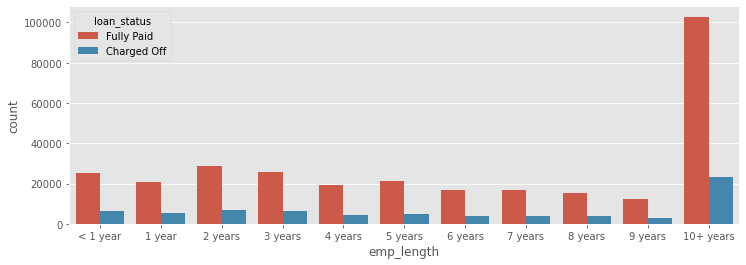

In [945]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order, hue="loan_status");

**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan**

In [946]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

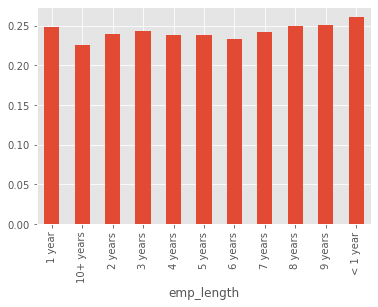

In [947]:
(emp_co/emp_fp).plot(kind="bar");

**Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [948]:
df.drop("emp_length", axis=1, inplace=True)

#### mort_acc
**可以用常规方法来进行缺失值处理，但根据变量的现实意义，结合下面的相关关系，我们用每组total_acc的平均mort_acc来代替缺失值**

In [949]:
df.corr()['mort_acc'].sort_values(ascending=False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [950]:
df["total_acc"].value_counts()

21.0     14280
22.0     14260
20.0     14228
23.0     13923
24.0     13878
         ...  
103.0        1
100.0        1
117.0        1
151.0        1
129.0        1
Name: total_acc, Length: 118, dtype: int64

In [951]:
total_acc_avg = df.groupby("total_acc").mean()["mort_acc"]

In [952]:
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [953]:
def fill_mort_acc(total_acc,mort_acc):
    
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [954]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [955]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
dtype: int64

In [956]:
df.dropna(inplace=True)

In [957]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


### Categorical Features

In [958]:
df.select_dtypes("object").columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

**We need to do some remedies on some categorical features, to make them more meaningful**

#### grade

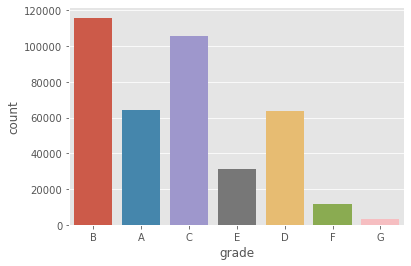

In [959]:
sns.countplot(x="grade", data=df);

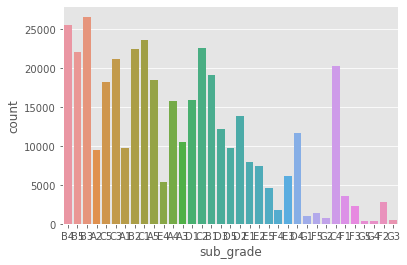

In [960]:
sns.countplot(x="sub_grade", data=df);

**grade and sub_grade have the similar information, while sub_grade is more specific. Therefore, drop the grade feature**

In [961]:
df.drop("grade", axis=1, inplace=True)

#### home_ownership

In [962]:
df["home_ownership"].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [963]:
df["home_ownership"] = df["home_ownership"].replace(["NONE", "ANY"], "OTHER")

#### issue_d

In [964]:
df["issue_d"].value_counts()

Oct-2014    14838
Jul-2014    12597
Jan-2015    11701
Dec-2013    10609
Nov-2013    10492
            ...  
Jan-2008        3
Dec-2007        2
Nov-2007        1
Oct-2007        1
Aug-2007        1
Name: issue_d, Length: 112, dtype: int64

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.(预测新的用户是不是会还贷款的时候，无法知道是不是给他放贷了，因为我们要先预测出新用户会不会还钱，才会决定是不是放贷**

In [965]:
df.drop("issue_d", axis=1, inplace=True)

#### earliest_cr_line

In [966]:
df["earliest_cr_line"].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Jan-1944       1
Nov-1950       1
Jul-1958       1
Jul-1960       1
Jul-1955       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [967]:
df["earliest_cr_line"] = df["earliest_cr_line"].apply(lambda x: int(x[-4:]))

#### address

Use the zipcode in address

In [968]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [969]:
df["zip_code"].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

<AxesSubplot:xlabel='zip_code', ylabel='count'>

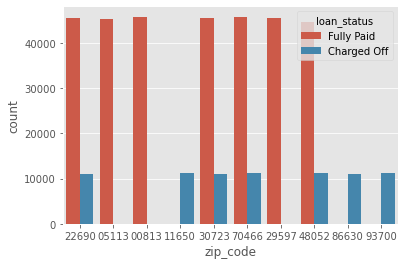

In [970]:
sns.countplot(data=df, x="zip_code", hue="loan_status")

In [971]:
df.drop("address", axis=1, inplace=True)

In [972]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code
0,10000.0,36 months,11.44,329.48,B4,RENT,117000.0,Not Verified,Fully Paid,vacation,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,22690
1,8000.0,36 months,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,05113
2,15600.0,36 months,10.49,506.97,B3,RENT,43057.0,Source Verified,Fully Paid,credit_card,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,05113
3,7200.0,36 months,6.49,220.65,A2,RENT,54000.0,Not Verified,Fully Paid,credit_card,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,00813
4,24375.0,60 months,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Charged Off,credit_card,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,11650


In [973]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   sub_grade             395219 non-null  object 
 5   home_ownership        395219 non-null  object 
 6   annual_inc            395219 non-null  float64
 7   verification_status   395219 non-null  object 
 8   loan_status           395219 non-null  object 
 9   purpose               395219 non-null  object 
 10  dti                   395219 non-null  float64
 11  earliest_cr_line      395219 non-null  int64  
 12  open_acc              395219 non-null  float64
 13  pub_rec               395219 non-null  float64
 14  revol_bal             395219 non-null  float64
 15  

### Spliting Dataset

In [974]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

In [975]:
from sklearn.model_selection import train_test_split

In [976]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [977]:
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((316175, 21), (316175,))

((79044, 21), (79044,))

## Model Selection

In [978]:
X_train.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code
372845,9700.0,36 months,17.27,347.14,C5,MORTGAGE,30000.0,Source Verified,debt_consolidation,18.00,...,10.0,0.0,9753.0,51.9,11.0,f,INDIVIDUAL,1.000000,0.0,29597
8087,20000.0,36 months,13.65,680.16,C1,RENT,55000.0,Source Verified,debt_consolidation,21.65,...,12.0,0.0,17144.0,41.1,18.0,f,INDIVIDUAL,0.000000,0.0,29597
381049,13350.0,60 months,17.27,333.73,D3,OWN,55000.0,Source Verified,debt_consolidation,20.53,...,8.0,0.0,18990.0,79.5,13.0,f,INDIVIDUAL,0.722124,0.0,22690
18334,4000.0,36 months,9.17,127.52,B2,MORTGAGE,65000.0,Source Verified,credit_card,16.38,...,7.0,1.0,4433.0,32.8,32.0,w,INDIVIDUAL,9.000000,1.0,70466
34030,20000.0,36 months,8.90,635.07,A5,MORTGAGE,230000.0,Source Verified,credit_card,9.32,...,12.0,0.0,42071.0,59.5,24.0,w,INDIVIDUAL,2.000000,0.0,22690


In [979]:
X_train_model_select = X_train.values
y_train_model_select = y_train.values

In [980]:
from sklearn.preprocessing import OrdinalEncoder

In [981]:
oe_X = OrdinalEncoder()
oe_X.fit(X_train_model_select)
X_train_model_select = oe_X.transform(X_train_model_select)

OrdinalEncoder()

In [982]:
oe_y = OrdinalEncoder()
oe_y.fit(y_train_model_select.reshape(-1,1))
y_train_model_select = oe_y.transform(y_train_model_select.reshape(-1,1))

OrdinalEncoder()

In [983]:
X_train_model_select

array([[3.480e+02, 0.000e+00, 3.090e+02, ..., 1.400e+01, 0.000e+00,
        4.000e+00],
       [7.600e+02, 0.000e+00, 1.910e+02, ..., 0.000e+00, 0.000e+00,
        4.000e+00],
       [4.940e+02, 1.000e+00, 3.090e+02, ..., 1.100e+01, 0.000e+00,
        3.000e+00],
       ...,
       [3.020e+02, 0.000e+00, 7.000e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [4.400e+02, 1.000e+00, 2.820e+02, ..., 2.600e+01, 0.000e+00,
        5.000e+00],
       [1.354e+03, 0.000e+00, 3.820e+02, ..., 8.100e+01, 0.000e+00,
        0.000e+00]])

### Mutual Information Feature Selection

Mutual information from the field of information theory is the application of information gain (typically used in the construction of decision trees) to feature selection.

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable

In [984]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [985]:
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_train_model_select, y_train_model_select.flatten())

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x7ffd0d080680>)

In [986]:
features_name = list(X_train.columns)

In [987]:
for i,j in enumerate(features_name):
    print("Feature {one}: {two}".format(one=j, two=fs.scores_[i]))

Feature loan_amnt: 0.009347679327644132
Feature term: 0.01652099891532699
Feature int_rate: 0.039124035229512355
Feature installment: 0.024641953385785786
Feature sub_grade: 0.03615268604513422
Feature home_ownership: 0.018910321928007345
Feature annual_inc: 0.0036071307513561024
Feature verification_status: 0.020748535174864857
Feature purpose: 0.016895099627128207
Feature dti: 0.007560030557197894
Feature earliest_cr_line: 0.003822937256819481
Feature open_acc: 0.0033044713971357442
Feature pub_rec: 0.0005817877006881744
Feature revol_bal: 0.0
Feature revol_util: 0.003593557099353939
Feature total_acc: 0.0011033580428316814
Feature initial_list_status: 0.009204088879953831
Feature application_type: 0.0522288124261745
Feature mort_acc: 0.005616520462509378
Feature pub_rec_bankruptcies: 0.0009546350728828479
Feature zip_code: 0.21929975029705173


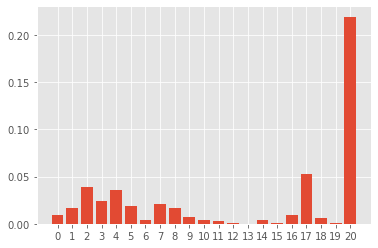

In [988]:
plt.bar(range(len(features_name)), list(fs.scores_))
plt.xticks(range(len(features_name)));

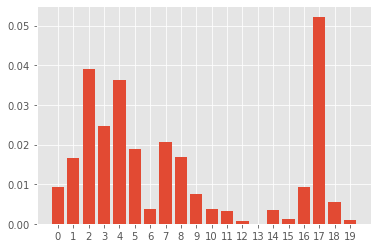

In [989]:
plt.bar(range(len(features_name)-1), list(fs.scores_[:-1]))
plt.xticks(range(len(features_name)-1));

**From the feature importance plot, we choose feature 1,2,3,4,5,7,8,17 to fit the model**

In [990]:
X_train = X_train.iloc[:,[0,1,2,3,4,5,7,8,9,16,17,18,20]]
X_test = X_test.iloc[:,[0,1,2,3,4,5,7,8,9,16,17,18,20]]

In [991]:
X_train.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,verification_status,purpose,dti,initial_list_status,application_type,mort_acc,zip_code
372845,9700.0,36 months,17.27,347.14,C5,MORTGAGE,Source Verified,debt_consolidation,18.00,f,INDIVIDUAL,1.000000,29597
8087,20000.0,36 months,13.65,680.16,C1,RENT,Source Verified,debt_consolidation,21.65,f,INDIVIDUAL,0.000000,29597
381049,13350.0,60 months,17.27,333.73,D3,OWN,Source Verified,debt_consolidation,20.53,f,INDIVIDUAL,0.722124,22690
18334,4000.0,36 months,9.17,127.52,B2,MORTGAGE,Source Verified,credit_card,16.38,w,INDIVIDUAL,9.000000,70466
34030,20000.0,36 months,8.90,635.07,A5,MORTGAGE,Source Verified,credit_card,9.32,w,INDIVIDUAL,2.000000,22690


## Encoding categorical variable

In [992]:
ca_name = list(X_train.select_dtypes("object").columns)

In [993]:
def Dum_variable(X):
    dummies = pd.get_dummies(X[ca_name],drop_first=True)
    X = X.drop(ca_name, axis=1)
    X = pd.concat([X, dummies], axis=1)
    return X

In [994]:
X_train = Dum_variable(X_train)
X_test = Dum_variable(X_test)

In [995]:
from sklearn.preprocessing import LabelEncoder

In [996]:
def encode_y(y):
    enc = LabelEncoder()
    return enc.fit_transform(y)

In [997]:
y_train = encode_y(y_train)
y_test = encode_y(y_test)

In [998]:
X_train

,loan_amnt,int_rate,installment,dti,mort_acc,term_ 60 months,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,...,application_type_JOINT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
372845,9700.0,17.27,347.14,18.00,1.000000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8087,20000.0,13.65,680.16,21.65,0.000000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
381049,13350.0,17.27,333.73,20.53,0.722124,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
18334,4000.0,9.17,127.52,16.38,9.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
34030,20000.0,8.90,635.07,9.32,2.000000,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312547,15000.0,14.99,519.91,26.04,4.000000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
137037,9600.0,18.25,348.27,21.60,0.000000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
205041,8550.0,9.67,274.57,8.35,0.000000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
214988,12000.0,16.24,293.35,26.16,2.000000,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Feature Scaling

In [999]:
X_train = X_train.values
X_test = X_test.values
y_train =y_train
y_test = y_test

In [1000]:
from sklearn.preprocessing import MinMaxScaler

In [1001]:
scaler = MinMaxScaler()
X_train[:,[0,1,2,3,4]] = scaler.fit_transform(X_train[:,[0,1,2,3,4]])
X_test[:,[0,1,2,3,4]] = scaler.transform(X_test[:,[0,1,2,3,4]])

## Creating the Model

In [1002]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [1003]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [1004]:
from tensorflow.keras.callbacks import EarlyStopping

In [1005]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [1006]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop]
          )

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 11s 35us/sample - loss: 0.3026 - val_loss: 0.2659
Epoch 2/25
316175/316175 [==============================] - 10s 31us/sample - loss: 0.2665 - val_loss: 0.2634
Epoch 3/25
316175/316175 [==============================] - 10s 33us/sample - loss: 0.2635 - val_loss: 0.2628
Epoch 4/25
316175/316175 [==============================] - 10s 32us/sample - loss: 0.2622 - val_loss: 0.2625
Epoch 5/25
316175/316175 [==============================] - 10s 32us/sample - loss: 0.2615 - val_loss: 0.2624
Epoch 6/25
316175/316175 [==============================] - 10s 33us/sample - loss: 0.2608 - val_loss: 0.2624
Epoch 7/25
316175/316175 [==============================] - 13s 42us/sample - loss: 0.2605 - val_loss: 0.2622
Epoch 8/25
316175/316175 [==============================] - 11s 35us/sample - loss: 0.2603 - val_loss: 0.2622
Epoch 9/25
316175/316175 [==============================] - 12s 38us/

## Model Evaluation

In [1007]:
losses = pd.DataFrame(model.history.history)

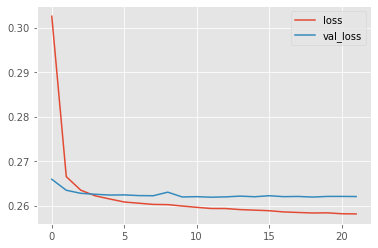

In [1008]:
losses.plot();

In [1009]:
from sklearn.metrics import classification_report

In [1010]:
pred = model.predict_classes(X_test)

In [1011]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.44      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

